In [106]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import re

In [4]:
'''
출처
https://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb
https://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/
'''

'\n출처\nhttps://github.com/inyl/my_notebook/blob/master/open_cv/image_color_cluster.ipynb\nhttps://www.pyimagesearch.com/2014/05/26/opencv-python-k-means-color-clustering/\n'

In [6]:
def dec_to_hex(color):
    if color < 16:
        return '0' + str(hex(int(color)).split('x')[1])
    else:
        return str(hex(int(color)).split('x')[1])

In [103]:
def read_real_color(filename, color_rank):
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_list = [str(list(image[i][k])) for i in range(len(image)) for k in range(len(image[0]))]
    image_unique = {}
    for d in image_list:
        if d not in image_unique:
            image_unique[d] = 1
        else:
            image_unique[d] += 1

    total_color_lists = sorted(image_unique.keys(), key=lambda x:image_unique[x], reverse=True)
    color_list = total_color_lists[color_rank]
    
    color_R = int(color_list.split('[')[1].split(']')[0].split(', ')[0])
    color_G = int(color_list.split('[')[1].split(']')[0].split(', ')[1])
    color_B = int(color_list.split('[')[1].split(']')[0].split(', ')[2])
    
    color_R = dec_to_hex(color_R)
    color_G = dec_to_hex(color_G)
    color_B = dec_to_hex(color_B)
    
    return str(color_R + color_G + color_B)

In [104]:
df_cafe = pd.read_csv('final_cafe_info_with_path.csv')
df_cafe = df_cafe.drop('Unnamed: 0', axis=1)
df_cafe.head()

,지역,지역구,카페명,주소,위도,경도,파일명
0,서서울,은평,스모어,서울 은평구 연서로29길 8-8,37.618952,126.919697,ws_ep_01.png
1,서서울,은평,필라멘트카페,서울 은평구 통일로 883,37.621753,126.919462,ws_ep_02.png
2,서서울,은평,HUGA,서울 은평구 진관2로 19,37.634753,126.919774,ws_ep_03.png
3,서서울,은평,YM Coffee Project,서울 은평구 연서로29길 21-8,37.619095,126.917542,ws_ep_04.png
4,서서울,은평,카페달력,서울 은평구 연서로18길 28-2,37.611930,126.920534,ws_ep_05.png


In [105]:
for i in range(5):
    color_list = []
    for n in df_cafe.index:
        png = './cafe_color_result/' + df_cafe['파일명'][n]
        color_list.append(read_real_color(png, i))
    col_name = str(i+1) + '번 색'
    df_cafe[col_name] = color_list

error: OpenCV(3.4.1) C:\Miniconda3\conda-bld\opencv-suite_1533128839831\work\modules\imgproc\src\color.cpp:11115: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


In [48]:
df_cafe.head()

,지역,지역구,카페명,주소,위도,경도,파일명,1번 색,2번 색,3번 색,4번 색,5번 색
0,서서울,은평,스모어,서울 은평구 연서로29길 8-8,37.618952,126.919697,ws_ep_01.png,dbd6cc,c7b29a,231a14,ab8f73,644f3f
1,서서울,은평,필라멘트카페,서울 은평구 통일로 883,37.621753,126.919462,ws_ep_02.png,201d1e,9d7653,5f4939,cead7d,e7e4cf
2,서서울,은평,HUGA,서울 은평구 진관2로 19,37.634753,126.919774,ws_ep_03.png,36a17c,8ebda8,e5e7df,6f6c49,272b15
3,서서울,은평,YM Coffee Project,서울 은평구 연서로29길 21-8,37.619095,126.917542,ws_ep_04.png,cab9ab,e9dfd8,403126,af8b6d,84634c
4,서서울,은평,카페달력,서울 은평구 연서로18길 28-2,37.611930,126.920534,ws_ep_05.png,e8ddd1,d3c0af,b19c89,5a432c,917457


In [49]:
df_cafe.to_csv('cafe_color_tidy_data.csv')

In [6]:
df_colors = pd.read_csv('final_cafe_color_tidy_data.csv')
df_colors.head()

,지역,지역구,카페명,주소,위도,경도,파일명,1번 색,2번 색,3번 색,4번 색,5번 색
0,서서울,은평,스모어,서울 은평구 연서로29길 8-8,37.618952,126.919697,ws_ep_01.png,dbd6cc,c7b29a,231a14,ab8f73,644f3f
1,서서울,은평,필라멘트카페,서울 은평구 통일로 883,37.621753,126.919462,ws_ep_02.png,201d1e,9d7653,5f4939,cead7d,e7e4cf
2,서서울,은평,HUGA,서울 은평구 진관2로 19,37.634753,126.919774,ws_ep_03.png,36a17c,8ebda8,e5e7df,6f6c49,272b15
3,서서울,은평,YM Coffee Project,서울 은평구 연서로29길 21-8,37.619095,126.917542,ws_ep_04.png,cab9ab,e9dfd8,403126,af8b6d,84634c
4,서서울,은평,카페달력,서울 은평구 연서로18길 28-2,37.611930,126.920534,ws_ep_05.png,e8ddd1,d3c0af,b19c89,5a432c,917457


In [12]:
color = list()
for i in range(1,6):
    for c in df_colors[f'{i}번 색'].tolist():
        color.append(c)
len(color)

1625

In [14]:
colors = pd.DataFrame(data={'color' : color})
colors.head()

,color
0,dbd6cc
1,201d1e
2,36a17c
3,cab9ab
4,e8ddd1


In [32]:
r = [c[:2] for c in color]
g = [c[2:4] for c in color]
b = [c[4:] for c in color]
len(r), len(g), len(b)

(1625, 1625, 1625)

In [37]:
colors['red(16)'] = r
colors['green(16)'] = g
colors['blue(16)'] = b
colors.head()

,color,red(16),green(16),blue(16)
0,dbd6cc,db,d6,cc
1,201d1e,20,1d,1e
2,36a17c,36,a1,7c
3,cab9ab,ca,b9,ab
4,e8ddd1,e8,dd,d1


In [39]:
r_10 = [int(c[:2], 16) for c in color]
g_10 = [int(c[2:4], 16) for c in color]
b_10 = [int(c[4:], 16) for c in color]

colors['red(10)'] = r_10
colors['green(10)'] = g_10
colors['blue(10)'] = b_10
colors.head()

,color,red(16),green(16),blue(16),red(10),green(10),blue(10)
0,dbd6cc,db,d6,cc,219,214,204
1,201d1e,20,1d,1e,32,29,30
2,36a17c,36,a1,7c,54,161,124
3,cab9ab,ca,b9,ab,202,185,171
4,e8ddd1,e8,dd,d1,232,221,209


In [40]:
colors.describe()

,red(10),green(10),blue(10)
count,1625.000000,1625.000000,1625.000000
mean,137.696615,124.476308,109.961231
std,66.755710,67.574295,68.942213
min,10.000000,6.000000,3.000000
25%,82.000000,68.000000,49.000000
50%,141.000000,123.000000,102.000000
75%,194.000000,178.000000,167.000000
max,252.000000,253.000000,250.000000


In [109]:
filename = r'C:\Users\rlath\dataitgirls\color_on_seoul_cafe\cafe_color_result\ws_ep_01.png'
image = cv2.imread(filename, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_list = [str(list(image[i][k])) for i in range(len(image)) for k in range(len(image[0]))]
image_unique = {}
for d in image_list:
    if d not in image_unique:
        image_unique[d] = 1
    else:
        image_unique[d] += 1

total_color_lists = sorted(image_unique.keys(), key=lambda x:image_unique[x], reverse=True)
total_color_lists
# color_list = total_color_lists[color_rank]

['[219, 214, 204]',
 '[199, 178, 154]',
 '[35, 26, 20]',
 '[171, 143, 115]',
 '[100, 79, 63]']

In [110]:
pd.DataFrame(data={'colors' : total_color_lists})

,colors
0,"[219, 214, 204]"
1,"[199, 178, 154]"
2,"[35, 26, 20]"
3,"[171, 143, 115]"
4,"[100, 79, 63]"


In [44]:
K = 3
kmeans_model = KMeans(n_clusters=K).fit(colors.iloc[:,4:])

In [46]:
out = colors.copy()
out['cluster'] =  kmeans_model.labels_
out.head(20)

,color,red(16),green(16),blue(16),red(10),green(10),blue(10),cluster
0,dbd6cc,db,d6,cc,219,214,204,1
1,201d1e,20,1d,1e,32,29,30,2
2,36a17c,36,a1,7c,54,161,124,0
3,cab9ab,ca,b9,ab,202,185,171,1
4,e8ddd1,e8,dd,d1,232,221,209,1
5,a29086,a2,90,86,162,144,134,0
6,654d3a,65,4d,3a,101,77,58,2
7,91724d,91,72,4d,145,114,77,0
8,775945,77,59,45,119,89,69,0
9,321f11,32,1f,11,50,31,17,2


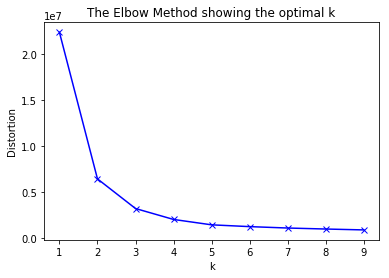

In [47]:
sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(colors.iloc[:,4:])
    sse.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# 색을 나누어서 보기

In [79]:
color01 = df_colors['1번 색'].tolist()
colors01 = pd.DataFrame(data={'color' : color01})
r = [int(c[:2], 16) for c in color01]
g = [int(c[2:4], 16) for c in color01]
b = [int(c[4:], 16) for c in color01]
colors01['red(16)'] = r
colors01['green(16)'] = g
colors01['blue(16)'] = b
colors01.head()

,color,red(16),green(16),blue(16)
0,dbd6cc,219,214,204
1,201d1e,32,29,30
2,36a17c,54,161,124
3,cab9ab,202,185,171
4,e8ddd1,232,221,209


In [80]:
colors01.iloc[:,1:] = colors01.iloc[:,1:].apply(lambda x: np.sqrt(x))
colors01.describe()

,red(16),green(16),blue(16)
count,325.000000,325.000000,325.000000
mean,10.286942,9.642426,8.907747
std,3.447186,3.542806,3.677556
min,3.162278,2.449490,2.449490
25%,6.855655,6.164414,5.477226
50%,10.816654,9.539392,8.602325
75%,13.379088,12.884099,12.369317
max,15.874508,15.811388,15.716234


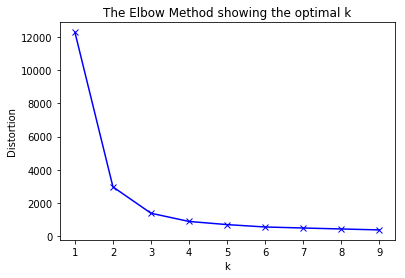

In [81]:
sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(colors01.iloc[:,1:])
    sse.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
K = 3
kmeans_model = KMeans(n_clusters=K).fit(colors01.iloc[:,1:])
out = colors01.copy()
out['cluster'] =  kmeans_model.labels_
out.head(20)

,color,red(16),green(16),blue(16),cluster
0,dbd6cc,14.798649,14.628739,14.282857,1
1,201d1e,5.656854,5.385165,5.477226,2
2,36a17c,7.348469,12.688578,11.135529,0
3,cab9ab,14.212670,13.601471,13.076697,1
4,e8ddd1,15.231546,14.866069,14.456832,1
5,a29086,12.727922,12.000000,11.575837,1
6,654d3a,10.049876,8.774964,7.615773,0
7,91724d,12.041595,10.677078,8.774964,0
8,775945,10.908712,9.433981,8.306624,0
9,321f11,7.071068,5.567764,4.123106,2


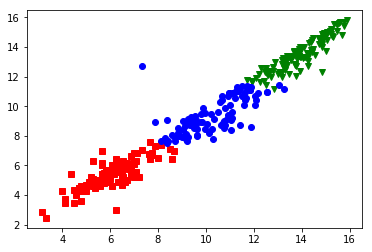

In [86]:
# cluster scatter plot 

c = ['b', 'g', 'r']
markers = ['o', 'v', 's']


x = colors01['red(16)']
y = colors01['green(16)']


plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x[i], y[i], color=c[l], marker=markers[l],ls='None')

plt.show()

In [78]:
out[out['cluster'] == 1]

,color,red(16),green(16),blue(16),cluster
0,dbd6cc,14.798649,14.628739,14.282857,1
3,cab9ab,14.212670,13.601471,13.076697,1
4,e8ddd1,15.231546,14.866069,14.456832,1
10,e0dede,14.966630,14.899664,14.899664,1
11,b1a69a,13.304135,12.884099,12.409674,1
12,c1baa9,13.892444,13.638182,13.000000,1
16,cfcdca,14.387495,14.317821,14.212670,1
17,dfdfd5,14.933185,14.933185,14.594520,1
18,d1c0ab,14.456832,13.856406,13.076697,1
19,e1ded8,15.000000,14.899664,14.696938,1


In [60]:
from mpl_toolkits import mplot3d
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

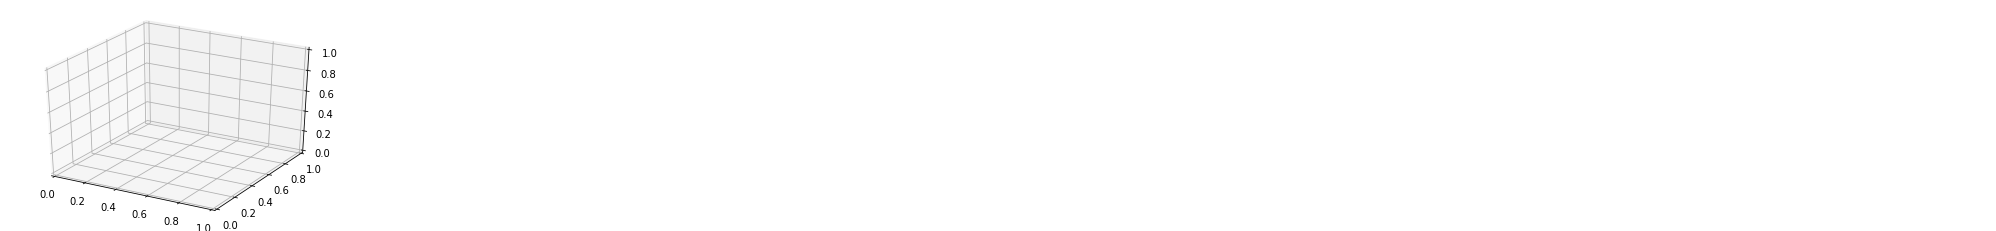

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')

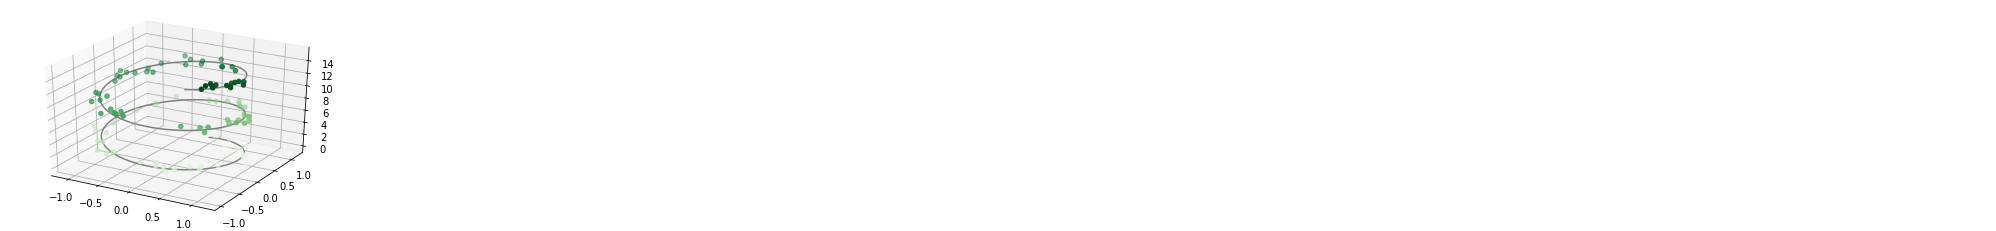

In [62]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')